In [1]:
import torch
import torch.nn as nn
from torchvision.models import vgg16 as VGG
from models import ConvVGG

from PIL import Image
from torchvision.transforms.functional import to_tensor

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print

<function print>

# VGG [4 points]

PyTorch provides some popular architectures as pre-implemented and also as pretrained models, see https://pytorch.org/docs/stable/torchvision/models.html. Follow the instructions in ``models.py`` to modify the VGG architecture by replacing the last fully connected layers by convolutional layers.

In [3]:
vgg = VGG(pretrained=True).eval()
vgg_conv = ConvVGG().eval()

In [5]:
print(vgg)
#res = vgg_conv(x)
#x=res2.sum((2, 3))
#print(res.shape)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [6]:
x = torch.randn(1, 3, 224, 224)

with torch.no_grad():
    res1 = vgg(x)
    res2 = vgg_conv(x)
print(res1[0,:9])
print(res1.shape)
print(res2[0,:9])
assert (res1 - res2).abs().max() < 1e-5

tensor([-0.2536,  3.3577, -1.5199, -1.1702,  0.4473,  3.0500,  2.9591,  1.8887,
         1.2767])
torch.Size([1, 1000])
tensor([-0.2536,  3.3577, -1.5199, -1.1702,  0.4473,  3.0500,  2.9591,  1.8887,
         1.2767])


``ConvVGG`` now should be capable of accepting input images of arbitrary spatial size. 

In [7]:
image = Image.open('auto.jpg')
h, w = image.size
x = to_tensor(image)
x = x[None, ...]

In [8]:
print(image.size)

(640, 296)


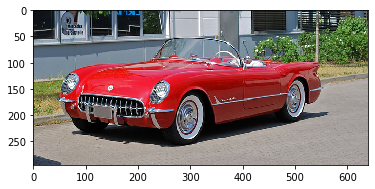

In [9]:
plt.imshow(x[0].permute(1, 2, 0));

In [10]:
with torch.no_grad():
    act = vgg_conv(x)

labels = act.softmax(1)
_, ind = labels.max(1)
print(ind)

tensor([511])
